# Association of Research Libraries Data

### Introduction

The Association of Research Libraries (ARL) is a voluntary professional organization of research intensive libraries across North America. These libraries can be public libraries (NYPL) and private libraries (the Smithsonian Institute) but the majority are at universities and colleges. Many libraries use the statistics generated by the ARL for benchmarking purposes, but often only use geography as the determining factor in comparisons. This can lead to very unfair and unreasonable comparisons between institutions, such as comparing University of Toronto with Queen's University because they are both in Ontario, despite the fact that U of T is more than 4 times the size. Because libraries represent a significant investment in research for an institution, for anyone who works in research directly, or who's business serves researchers, having a more accurate comparison would be helpful.

This capstone project will take data from ARL to find university libraries with similar research profiles and map them so we can see which universities are similar. This could be used by people looking for employment in universities, or businesses who want to know if their company might be successful in a similar environment elsewhere.

### Data

The data from ARL includes details like the number of students, both full time and part time, as well as the number of undergraduate and graduate students. It includes the number of full time faculty and whether the school has a medical or legal program. Other information includes the budgets of the university libraries, amount spent on renewable resources (eg. journal subscriptions) as compared to books and other one-time purchases, the staffing levels of the libraries, and what percentage are professional staff, support staff and student assistants.

### Methodology

First we import the libraries we need:

In [1]:
import numpy as np  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


Then we get the data:

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6202ed263f8f4f51983b845ba3b9469f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SMKiXVXpvSzbaqvsIdFNE_coeZ9pBogoSHdYVAvYd39p',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6202ed263f8f4f51983b845ba3b9469f.get_object(Bucket='arlstatistics-donotdelete-pr-kbcmhh3usmtlbb',Key='arl_statistics_data_download.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [3]:
df_data_1 = pd.read_csv(body)
df_data_1.head()

,year,instno,inam,type,region,membyr,exch,rank2,in_index,rank1,...,totsal,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac
0,2000,100,ALABAMA,S,6,1967,1,.,.,99,...,4220172,1550599,10829696,15721,.,2580,.,110,43,.
1,2000,200,ALBERTA,C,10,1969,1.47192,.,.,26,...,7738491,1514642,16124791,26532,.,2972,.,283,105,.
2,2000,300,ARIZONA,S,8,1967,1,.,.,29,...,9593634,2740142,22629734,26950,.,5346,.,417,90,.
3,2000,400,ARIZONA STATE,S,8,1973,1,.,.,32,...,10476282,2897484,22782527,35280,.,6290,.,246,43,.
4,2000,440,AUBURN,S,6,1992,1,.,.,92,...,4115286,1840439,10220052,19929,.,2052,.,170,40,.


Great! Now looking at the year column, I can see quite a bit of this data is out of date. Let's just strip it to the most recent year available, which is 2019.

In [4]:
df_data_1 = df_data_1.drop(df_data_1[df_data_1.year < 2019].index)



In [5]:
df_data_1.head()

,year,instno,inam,type,region,membyr,exch,rank2,in_index,rank1,...,totsal,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac
2350,2019,100,ALABAMA,S,6,1967,1,75,-0.521379984,.,...,7568089,2573757,21761848,33038,5354,3006,1910,282,57,1431
2351,2019,200,ALBERTA,C,10,1969,1.3237,30,0.269180512,.,...,12075305.58,4613129.86,36237394.42,35177,3872,6508,1463,452,.,1618
2352,2019,300,ARIZONA,S,8,1967,1,39,0.099046166,.,...,12721638,4222988,33373995,44696,7884,10543,2758,1085,119,2103
2353,2019,400,ARIZONA STATE,S,8,1973,1,54,-0.211452263,.,...,12714916,3770190,28483784,78693,32715,12498,8893,990,90,3335
2354,2019,440,AUBURN,S,6,1992,1,106,-0.893339552,.,...,4866578,1852714,15203203,25806,4634,3346,2466,521,69,1375


Wow! Alabama has doubled its student population (totstu column) in the last 20 years. This is why we need to always be changing our comparators. 

As we also mentioned, not every library in the ARL is a university library. Because we're interested in making comparisons by student population size, let's get rid of institutions with no students

In [6]:
df_data_1.tail(10)

,year,instno,inam,type,region,membyr,exch,rank2,in_index,rank1,...,totsal,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac
2464,2019,9700,YALE,P,1,1932,1,2,3.668369361,.,...,43867811,14917978,98644545,13249,120,7310,95,755,70,2643
2465,2019,9800,YORK,C,10,1979,1.3237,107,-0.89937546,.,...,2326370.02,1842824.66,14901343.96,48546,8603,4632,1897,204,43,1656
2466,2019,9850,BOSTON PUBLIC,N,1,1933,1,.,.,.,...,.,.,48527516,.,.,.,.,.,.,.
2467,2019,9870,CENTER FOR RESEARCH LIBS,N,3,1962,1,.,.,.,...,3366770,.,5366770,.,.,.,.,.,.,.
2468,2019,9890,LIBRARY OF CONGRESS,N,5,1932,1,.,.,.,...,245685586,234366414,514591868,.,.,.,.,.,.,.
2469,2019,9910,NATL AGRICULTURAL LIB,N,5,1948,1,.,.,.,...,7490568,7120974,20612431,.,.,.,.,.,.,.
2470,2019,9915,NATL ARCHIVES,N,5,2010,1,.,.,.,...,.,.,343563300,.,.,.,.,.,.,.
2471,2019,9930,NATL LIB OF MEDICINE,N,5,1948,1,.,.,.,...,25830612,26432774,67184799,0,0,0,0,0,0,0
2472,2019,9950,NEW YORK PUBLIC,N,2,1932,1,.,.,.,...,58120000,37470000,113801516,.,.,.,.,.,.,.
2473,2019,9980,SMITHSONIAN,N,5,1971,1,.,.,.,...,9614813,252059,12284264,.,.,.,.,.,.,.


In [7]:
df_data_1.drop(df_data_1.tail(8).index,inplace=True) # drop last n rows


In [8]:
df_data_1.tail(10)

,year,instno,inam,type,region,membyr,exch,rank2,in_index,rank1,...,totsal,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac
2456,2019,9000,VIRGINIA TECH,S,5,1976,1,72,-0.442183395,.,...,9920479,3061216,23571976,31972,2711,4792,2080,629,55,1938
2457,2019,9100,WASHINGTON,S,9,1932,1,15,1.055719805,.,...,23387824,5886130,50673349,51260,7384,13136,3534,1480,116,4769
2458,2019,9200,WASHINGTON STATE,S,9,1962,1,105,-0.891692863,.,...,6176904,1215963,15526574,26683,4795,3806,1574,330,65,1334
2459,2019,9300,WASHINGTON U.-ST. LOUIS,P,4,1932,1,43,-0.028097027,.,...,11346466,4063691,30587311,13773,2079,6627,1474,789,53,2065
2460,2019,9350,WATERLOO,C,10,1984,1.3237,101,-0.802592799,.,...,6904104.4,1297210.09,17177516.81,37372,2622,4728,1264,327,69,1259
2461,2019,9400,WAYNE STATE,S,3,1962,1,81,-0.589924835,.,...,7665979,1565518,20600927,18746,8279,5790,3661,775,68,1028
2462,2019,9500,WESTERN,C,10,1976,1.3237,87,-0.644804667,.,...,6848711.94,828005.59,19322782.35,30693,2663,5911,146,369,50,1395
2463,2019,9600,WISCONSIN,S,3,1932,1,34,0.185320966,.,...,17419612,4418958,34982342,39045,4418,9670,2088,1468,115,3513
2464,2019,9700,YALE,P,1,1932,1,2,3.668369361,.,...,43867811,14917978,98644545,13249,120,7310,95,755,70,2643
2465,2019,9800,YORK,C,10,1979,1.3237,107,-0.89937546,.,...,2326370.02,1842824.66,14901343.96,48546,8603,4632,1897,204,43,1656


In [9]:
from sklearn.cluster import KMeans 

OK, there's a lot of columns we're not going to use here, so let's get rid of them. In fact, for this exercise, the only thing I'm really interested in is the number of faculty and students in each category. So everything else can go.

In [10]:
df_data_1.drop(columns =['year','instno', 'type', 'region', 'membyr', 'exch', 'rank2', 'in_index', 'rank1', 'index', 'volsadg', 'volsadn', 'volswdn', 'mono', 'serpur','sernpur', 'currser', 'microf', 'govdocs', 'mss', 'maps', 'graphic', 'audio', 'video', 'compfil', 'totcirc', 'expmono','expser', 'expoth', 'expmisc', 'expbnd', 'vols', 'illtot', 'ilbtot', 'grppres', 'presptcp', 'reftrans', 'initcirc', 'totstfx', 'explm', 'salprf', 'salnprf', 'salstud', 'totsal', 'opexp', 'totexp', 'phdawd', 'phdfld'
])

,inam,prfstf,nprfstf,studast,totstf,totstu,totpt,gradstu,gradpt,fac
2350,ALABAMA,71,53,33,124,33038,5354,3006,1910,1431
2351,ALBERTA,90,118,31,208,35177,3872,6508,1463,1618
2352,ARIZONA,77,122,30,199,44696,7884,10543,2758,2103
2353,ARIZONA STATE,72,149,.,221,78693,32715,12498,8893,3335
2354,AUBURN,49,22,32,71,25806,4634,3346,2466,1375
...,...,...,...,...,...,...,...,...,...,...
2461,WAYNE STATE,58,50,19,108,18746,8279,5790,3661,1028
2462,WESTERN,61,69,12,130,30693,2663,5911,146,1395
2463,WISCONSIN,158,96,92,254,39045,4418,9670,2088,3513
2464,YALE,271,275,67,546,13249,120,7310,95,2643


Apparently a lot of these columns aren't integers, so let's change that.

In [11]:
df_data_1['totstu'] = df_data_1['totstu'].astype(int)

In [12]:
df_data_1['totpt'] = df_data_1['totpt'].astype(int)

In [13]:
df_data_1['gradstu'] = df_data_1['gradstu'].astype(int)

In [14]:
df_data_1['gradpt'] = df_data_1['gradpt'].astype(int)

In [15]:
df_data_1['fac'] = df_data_1['fac'].astype(int)

In [16]:
df_data_1.columns[1:]

Index(['instno', 'inam', 'type', 'region', 'membyr', 'exch', 'rank2',
       'in_index', 'rank1', 'index', 'vols', 'volsadg', 'volsadn', 'volswdn',
       'mono', 'serpur', 'sernpur', 'currser', 'microf', 'govdocs', 'mss',
       'maps', 'graphic', 'audio', 'video', 'compfil', 'illtot', 'ilbtot',
       'grppres', 'presptcp', 'reftrans', 'initcirc', 'totcirc', 'prfstf',
       'nprfstf', 'studast', 'totstf', 'totstfx', 'expmono', 'expser',
       'expoth', 'expmisc', 'explm', 'expbnd', 'salprf', 'salnprf', 'salstud',
       'totsal', 'opexp', 'totexp', 'totstu', 'totpt', 'gradstu', 'gradpt',
       'phdawd', 'phdfld', 'fac'],
      dtype='object')

In [17]:
df_data_1.columns = list(map(str, df_data_1.columns))

In [18]:
df_data_1.set_index('inam', inplace=True)

OK, that's better. Now we can create a scatter plot that shows the ratio of students to faculty in ARL institutions. Note it isn't completely accurate. For some reason, ARL only asks for the number of full-time, tenure track faculty. If you've been following higher education for the last couple of decades, you'll know that there has been a remarkable increase in using adjunct faculty to do the work. It also doesn't include clinical faculty, which means if your school has a medical, nursing, dental or vetrinary school, it will be significantly underreporting the number of faculty. However, from the perspective of the library, this is significant because we serve all faculty, regardless of whether they are tenure track or adjuncts the same.

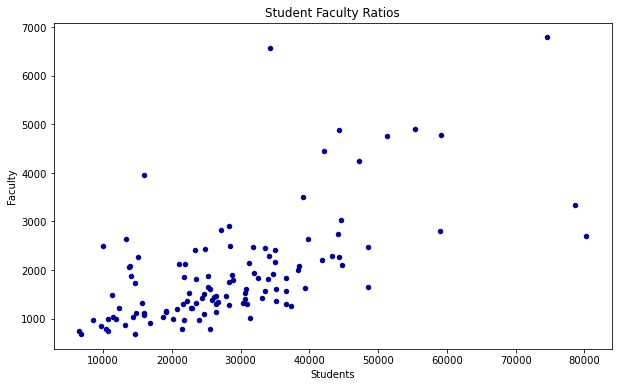

In [19]:
df_data_1.plot(kind='scatter', x='totstu', y='fac', figsize=(10, 6), color='darkblue')

plt.title('Student Faculty Ratios')
plt.xlabel('Students')
plt.ylabel('Faculty')

plt.show()

Isn't that scatter plot a thing of beauty! Wow! There's some real outliers at the top end, places like U of T (80,000 students). You can see why even though they are also in Ontario, it doesn't make sense to compare ourselves to them.

So now let's get down to the business of clustering our schools. We're going to use machine learning to classify schools based on similar characteristics - the number of students and faculty reported.

In [20]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

%matplotlib inline

In [21]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, ALABAMA to YORK
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      116 non-null    int64 
 1   instno    116 non-null    int64 
 2   type      116 non-null    object
 3   region    116 non-null    int64 
 4   membyr    116 non-null    int64 
 5   exch      116 non-null    object
 6   rank2     116 non-null    object
 7   in_index  116 non-null    object
 8   rank1     116 non-null    object
 9   index     116 non-null    object
 10  vols      116 non-null    object
 11  volsadg   116 non-null    object
 12  volsadn   116 non-null    object
 13  volswdn   116 non-null    object
 14  mono      116 non-null    object
 15  serpur    116 non-null    object
 16  sernpur   116 non-null    object
 17  currser   116 non-null    object
 18  microf    116 non-null    object
 19  govdocs   116 non-null    object
 20  mss       116 non-null    object
 21  maps      116 

We need to turn all this data into a numpy array using integers, so we can normalize the data.

In [22]:
# Prepare data for model
dbscan_data = df_data_1[['totstu', 'fac']]
dbscan_data = dbscan_data.values.astype('int',)
dbscan_data

array([[33038,  1431],
       [35177,  1618],
       [44696,  2103],
       [78693,  3335],
       [25806,  1375],
       [28287,  2897],
       [13165,   860],
       [28253,  1272],
       [47272,  4256],
       [ 9633,   851],
       [33955,  1812],
       [39393,  1621],
       [36612,  1562],
       [35100,  1364],
       [44237,  2266],
       [23922,   969],
       [36590,  1296],
       [24641,  1095],
       [10663,   743],
       [15014,  2271],
       [33595,  2452],
       [30730,  1611],
       [25601,  1600],
       [31790,  2466],
       [28824,  1804],
       [23499,  1821],
       [ 6494,   751],
       [21677,  1306],
       [15700,  1317],
       [13892,  2078],
       [44135,  2734],
       [34735,  1916],
       [19098,  1143],
       [14741,  1117],
       [34930,  2156],
       [14318,  1025],
       [21478,   786],
       [21009,  2126],
       [14017,  1875],
       [33608,  1562],
       [10695,   997],
       [27117,  2817],
       [43313,  2292],
       [385

Now let's normalize the data, so we aren't overcounting students and undercounting faculty. Again, we're still undercounting, because ARL doesn't look at adjuncts, but we can only go with the data we have.

In [23]:
# Normalize data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 3.14455433e-01, -4.43444093e-01],
       [ 4.67170461e-01, -2.76054867e-01],
       [ 1.14678446e+00,  1.58082965e-01],
       [ 3.57401811e+00,  1.26088257e+00],
       [-2.01877001e-01, -4.93571348e-01],
       [-2.47447041e-02,  8.68815829e-01],
       [-1.10438783e+00, -9.54563067e-01],
       [-2.71721519e-02, -5.85769692e-01],
       [ 1.33069933e+00,  2.08529689e+00],
       [-1.35655682e+00, -9.62619233e-01],
       [ 3.79925129e-01, -1.02399734e-01],
       [ 7.68173992e-01, -2.73369478e-01],
       [ 5.69623038e-01, -3.26182122e-01],
       [ 4.61673005e-01, -5.03417773e-01],
       [ 1.11401391e+00,  3.03989082e-01],
       [-3.36386169e-01, -8.56993946e-01],
       [ 5.68052337e-01, -5.64286583e-01],
       [-2.85052787e-01, -7.44207622e-01],
       [-1.28301943e+00, -1.05929322e+00],
       [-9.72377502e-01,  3.08464730e-01],
       [ 3.54222741e-01,  4.70483179e-01],
       [ 1.49674563e-01, -2.82320774e-01],
       [-2.16513083e-01, -2.92167199e-01],
       [ 2.

With DBSCAN, you need to guesstimate your epsilon based on your knowledge of the data. This was tricky, because we have a lot of outliers at the far reaches, but the rest of the schools are clustered pretty close together already. I kept the standard number of minimum samples at 4, but played a but with the epsilon until I got a number of clusters that seemed reasonable.

In [24]:
# Construct model
'''
-- min_samples :: requires a minimum 20 data points in a neighborhood
-- eps :: in radius 0.02
'''

model = DBSCAN(eps = 0.18, min_samples = 4, metric='euclidean').\
    fit(dbscan_data)
model

DBSCAN(eps=0.18, min_samples=4)

In [25]:
# Visualize the results
# separate outliers from clustered data
outliers_df = dbscan_data[model.labels_ == -1]
clusters_df = dbscan_data[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

# Get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print('Number of clusters = {}'.format(len(clusters)-1))


Counter({-1: 54, 0: 35, 1: 13, 4: 5, 3: 5, 2: 4})
Number of clusters = 5


Now let's take those clusters of universities and plot them on a scatter plot. I'll make the plot and dots a little bigger so we can see it better.

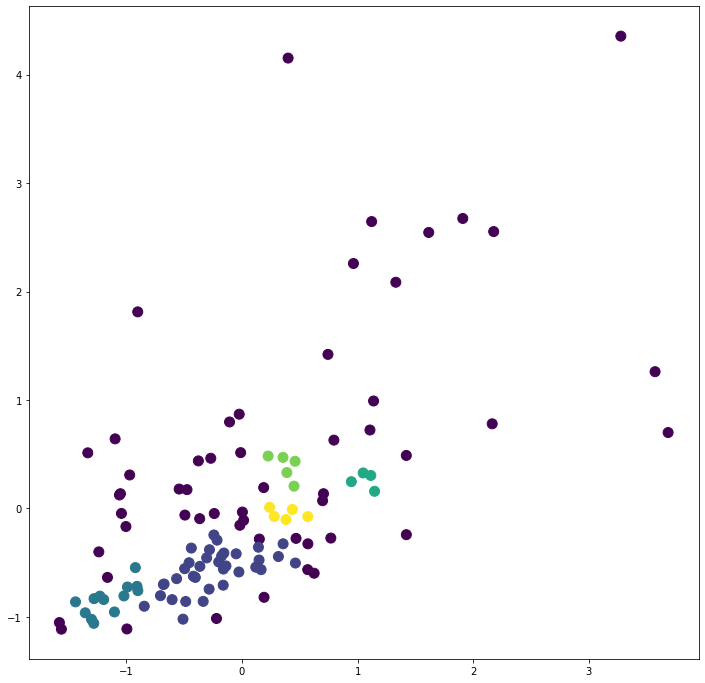

In [26]:
plt.scatter(dbscan_data[:,0], dbscan_data[:,1], s=100, c=model.labels_)
plt.gcf().set_size_inches((12, 12))    
plt.show()

There! Now we have 5 groups of universities that are similar. The teal ones, which are the smallest. The purple, which includes Queen's, which are medium sized and includes the largest number of similar universities. The yellow, which are 5 larger universities, and two groups of light and dark green clusters, which are larger still. The black dots are the outliers, which don't fit into any cluster.

### Results

Now let's look at which schools are in which clusters. First, the thirteen teal schools:

In [29]:
df_data_1["Clus_Db"]=model.labels_
df_data_1[df_data_1["Clus_Db"]==0]

df_data_1[df_data_1["Clus_Db"]==1]

,year,instno,type,region,membyr,exch,rank2,in_index,rank1,index,...,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac,Clus_Db
inam,,,,,,,,,,,,,,,,,,,,,
BOSTON COLLEGE,2019,550,P,1,2000,1,55,-0.252773997,.,.,...,1378005,26277312,13165,1555,3469,1324,387,31,860,1
BROWN,2019,800,P,1,1932,1,56,-0.279461776,.,.,...,2308103,26335298,9633,283,2912,257,225,46,851,1
CASE WESTERN RESERVE,2019,1500,P,3,1969,1,108,-0.899676794,.,.,...,1639743,15190286,10663,1228,5567,1062,667,60,743,1
DUKE,2019,2400,P,5,1932,1,16,1.053236195,.,.,...,4892719,49063199,15700,906,9041,883,896,62,1317,1
GEORGETOWN,2019,2800,P,5,1962,1,49,-0.124615049,.,.,...,2716051,29172336,14741,4463,7751,3994,960,29,1117,1
GEORGIA TECH,2019,2950,S,5,1983,1,102,-0.806016255,.,.,...,1373166,16700932,14318,1731,6546,10128,530,40,1025,1
HOWARD,2019,3400,P,5,1971,1,116,-1.396662162,.,.,...,51529,6537403,10695,684,4125,420,91,31,997,1
MIT,2019,4900,P,1,1932,1,51,-0.159674062,.,.,...,3519592,28508408,11402,172,6845,127,687,37,1023,1
MIAMI,2019,5000,P,5,1976,1,41,0.019419994,.,.,...,8015352,32382046,15904,1427,5420,794,805,68,1124,1


Now the 35 purple schools:

In [36]:
df_data_1["Clus_Db"]=model.labels_
df_data_1[df_data_1["Clus_Db"]==-1]

df_data_1[df_data_1["Clus_Db"]==0]

,year,instno,type,region,membyr,exch,rank2,in_index,rank1,index,...,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac,Clus_Db
inam,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2019,100,S,6,1967,1,75,-0.521379984,.,.,...,2573757,21761848,33038,5354,3006,1910,282,57,1431,0
AUBURN,2019,440,S,6,1992,1,106,-0.893339552,.,.,...,1852714,15203203,25806,4634,3346,2466,521,69,1375,0
BRIGHAM YOUNG,2019,600,P,8,1974,1,32,0.206095912,.,.,...,3492129,35085870,28253,3188,1909,1149,93,26,1272,0
"CALIFORNIA, IRVINE",2019,1050,S,9,1981,1,74,-0.514023243,.,.,...,1718948,22727972,35100,932,5850,446,670,64,1364,0
"CALIFORNIA, RIVERSIDE",2019,1200,S,9,1979,1,112,-1.063293417,.,.,...,1828272,13016768,23922,625,3087,254,354,42,969,0
"CALIFORNIA, SANTA BARBARA",2019,1400,S,9,1973,1,91,-0.688989846,.,.,...,4155433,20508706,24641,416,2865,6,321,47,1095,0
COLORADO STATE,2019,1900,S,8,1975,1,104,-0.849479464,.,.,...,1239696,15906139,25601,7877,3074,4442,405,52,1600,0
DELAWARE,2019,2350,S,5,1983,1,70,-0.436609704,.,.,...,2310760,23165468,21677,1547,3343,821,313,55,1306,0
GEORGE WASHINGTON,2019,2750,P,5,1998,1,37,0.160613781,.,.,...,5349122,34622248,19098,8268,7755,7071,1074,56,1143,0


Now the four dark green schools:

In [31]:
df_data_1["Clus_Db"]=model.labels_
df_data_1[df_data_1["Clus_Db"]==1]

df_data_1[df_data_1["Clus_Db"]==2]

,year,instno,type,region,membyr,exch,rank2,in_index,rank1,index,...,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac,Clus_Db
inam,,,,,,,,,,,,,,,,,,,,,
ARIZONA,2019,300,S,8,1967,1,39,0.099046166,.,.,...,4222988,33373995,44696,7884,10543,2758,1085,119,2103,2
"CALIFORNIA, LOS ANGELES",2019,1100,S,9,1937,1,11,1.410661689,.,.,...,9966409,59149679,44237,1608,13301,1040,721,83,2266,2
"ILLINOIS, URBANA",2019,3500,S,3,1932,1,12,1.264473899,.,.,...,12336048,55788294,43313,6389,10556,5231,1070,93,2292,2
SOUTHERN CALIFORNIA,2019,7500,P,9,1962,1,19,0.978593377,.,.,...,8901718,49841778,41879,6696,22685,5983,2056,141,2202,2


The five yellow schools:

In [32]:
df_data_1["Clus_Db"]=model.labels_
df_data_1[df_data_1["Clus_Db"]==2]

df_data_1[df_data_1["Clus_Db"]==3]

,year,instno,type,region,membyr,exch,rank2,in_index,rank1,index,...,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac,Clus_Db
inam,,,,,,,,,,,,,,,,,,,,,
CINCINNATI,2019,1700,S,3,1932,1,68,-0.422765203,.,.,...,1934542,23287379,33595,12354,5666,5464,779,78,2452,3
COLUMBIA,2019,2000,P,2,1932,1,3,2.430192008,.,.,...,5321868,73299799,31790,10924,21186,9210,1454,238,2466,3
GEORGIA,2019,2900,S,5,1967,1,46,-0.080561784,.,.,...,3794444,30126288,34930,3722,6983,2058,917,27,2156,3
TEMPLE,2019,8200,S,2,1962,1,63,-0.378680735,.,.,...,3644325,24614082,34068,4655,7282,2371,1131,69,2296,3
TEXAS TECH,2019,8550,S,7,1997,1,42,-0.013475978,.,.,...,2874646,30898024,35058,8234,6260,3555,958,62,2412,3


And the five light green schools:

In [34]:
df_data_1["Clus_Db"]=model.labels_
df_data_1[df_data_1["Clus_Db"]==3]

df_data_1[df_data_1["Clus_Db"]==4]

,year,instno,type,region,membyr,exch,rank2,in_index,rank1,index,...,opexp,totexp,totstu,totpt,gradstu,gradpt,phdawd,phdfld,fac,Clus_Db
inam,,,,,,,,,,,,,,,,,,,,,
CALGARY,2019,860,C,10,2009,1.3237,79,-0.539805059,.,.,...,1619799.8,22129141.8,33955,7907,6306,1601,507,48,1812,4
FLORIDA STATE,2019,2700,S,5,1962,1,89,-0.674724997,.,.,...,1092012,19142148,34735,6270,5695,2838,730,67,1916,4
MARYLAND,2019,4700,S,5,1962,1,52,-0.167087691,.,.,...,3890864,28630112,36603,4597,8102,2336,641,82,1843,4
SOUTH CAROLINA,2019,7400,S,5,1975,1,65,-0.40284022,.,.,...,2801439,24254106,32542,3525,6909,2425,1150,71,1843,4
VIRGINIA TECH,2019,9000,S,5,1976,1,72,-0.442183395,.,.,...,3061216,23571976,31972,2711,4792,2080,629,55,1938,4


# FourSquare data

Now I'm going to try to use FourSquare data to compare the four dark green schools: University of Arizona, UCLA, University of Illinois at Urbana and USC. These four schools form the smallest cluster and might be a good opportunity to expand your business with a similar client base.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


     |████████████████████████████████| 79 kB 7.9 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=93a896d9f952992eeda6e581620392f5318d801d1fabcc7a4f1f2634e5b15a1d
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'J3MOVTWUGSMGZC5KLYX4VKGUKQN3USXSKLBZBEVN2RWTDOUH' # your Foursquare ID
CLIENT_SECRET = 'LXHJQU1CSHX3DZITQSDHZCOPHXQ5YPD2KAGFN1D4KF4GQFMF' # your Foursquare Secret
ACCESS_TOKEN = 'ECOL5AE1ID2ZGTSRVR0D2FALGEN1EER225COPYCIJV4HO11E' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J3MOVTWUGSMGZC5KLYX4VKGUKQN3USXSKLBZBEVN2RWTDOUH
CLIENT_SECRET:LXHJQU1CSHX3DZITQSDHZCOPHXQ5YPD2KAGFN1D4KF4GQFMF


In [5]:
venue_id = '4b1f5dfbf964a520dd2524e3' # fIND THE VENUE IDS OF THE DIFFERENT COLLEGES
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
url

'https://api.foursquare.com/v2/venues/4b1f5dfbf964a520dd2524e3?client_id=J3MOVTWUGSMGZC5KLYX4VKGUKQN3USXSKLBZBEVN2RWTDOUH&client_secret=LXHJQU1CSHX3DZITQSDHZCOPHXQ5YPD2KAGFN1D4KF4GQFMF&oauth_token=ECOL5AE1ID2ZGTSRVR0D2FALGEN1EER225COPYCIJV4HO11E&v=20180604'